In [1]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data="images", det_model="yolo11x.pt", sam_model="sam2_b.pt")

100%|██████████| 109M/109M [03:04<00:00, 620kB/s]  


100%|██████████| 154M/154M [03:13<00:00, 838kB/s]  



image 1/245 /Users/farouq/projects/team-6-hackathon/images/WhatsApp Image 2025-02-14 at 12.10.21 (1).jpeg: 640x480 (no detections), 429.4ms
image 2/245 /Users/farouq/projects/team-6-hackathon/images/WhatsApp Image 2025-02-14 at 12.10.21 (2).jpeg: 640x480 2 refrigerators, 388.8ms
image 3/245 /Users/farouq/projects/team-6-hackathon/images/WhatsApp Image 2025-02-14 at 12.10.21.jpeg: 640x480 2 persons, 373.5ms
image 4/245 /Users/farouq/projects/team-6-hackathon/images/WhatsApp Image 2025-02-14 at 12.10.22 (1).jpeg: 640x480 (no detections), 387.2ms
image 5/245 /Users/farouq/projects/team-6-hackathon/images/WhatsApp Image 2025-02-14 at 12.10.22 (2).jpeg: 640x480 (no detections), 409.0ms
image 6/245 /Users/farouq/projects/team-6-hackathon/images/WhatsApp Image 2025-02-14 at 12.10.22 (3).jpeg: 640x480 1 person, 368.5ms
image 7/245 /Users/farouq/projects/team-6-hackathon/images/WhatsApp Image 2025-02-14 at 12.10.22.jpeg: 640x480 (no detections), 489.2ms
image 8/245 /Users/farouq/projects/team-

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_folder = "images"
label_folder = "images_annotate_labels"

# Iterate through each image in the folder
for image_file in os.listdir(image_folder):
    if image_file.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder, image_file)
        label_path = os.path.join(label_folder, os.path.splitext(image_file)[0] + ".txt")

        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Extract width and height
        height, width, _ = image.shape

        # Load annotation if file exists
        if os.path.exists(label_path):
            with open(label_path, 'r') as file:
                annotation = list(map(float, file.read().split()))
        else:
            continue
        
        # Extract points from annotation
        num_points = int(annotation[0])
        points = annotation[1:num_points*2 + 1]

        # Convert normalized coordinates to pixel values
        polygon = np.array([(int(x * width), int(y * height)) for x, y in zip(points[::2], points[1::2])], np.int32)

        # Draw polygon on the image
        overlay = image.copy()
        cv2.polylines(overlay, [polygon], isClosed=True, color=(255, 0, 0), thickness=2)

        # Show the image with annotation
        plt.figure(figsize=(10, 6))
        plt.imshow(overlay)
        plt.axis("off")
        plt.title(image_file)
        plt.show()

## Rename Box Datasets

In [8]:
import json
import shutil
from pathlib import Path

# Define paths
coco_train_images = Path("OSCD/images/train2017")
coco_val_images = Path("OSCD/images/val2017")
coco_train_annotations = Path("OSCD/annotations/instances_train2017.json")
coco_val_annotations = Path("OSCD/annotations/instances_val2017.json")
yolo_train_images = Path("OSCD/YOLO/train2017")
yolo_val_images = Path("OSCD/YOLO/val2017")
yolo_train_labels = Path("OSCD/YOLO/train2017/labels")
yolo_val_labels = Path("OSCD/YOLO/val2017/labels")

# Create YOLO directories if they don't exist
yolo_train_images.mkdir(parents=True, exist_ok=True)
yolo_val_images.mkdir(parents=True, exist_ok=True)
yolo_train_labels.mkdir(parents=True, exist_ok=True)
yolo_val_labels.mkdir(parents=True, exist_ok=True)

def convert_coco_to_yolo(coco_annotation_path, yolo_image_path, yolo_label_path):
    with open(coco_annotation_path) as f:
        coco_data = json.load(f)

    images = {image['id']: image for image in coco_data['images']}
    categories = {category['id']: category for category in coco_data['categories']}
    annotations = coco_data['annotations']

    for annotation in annotations:
        image_id = annotation['image_id']
        image_info = images[image_id]
        category_id = annotation['category_id']
        bbox = annotation['bbox']

        # Convert bbox from COCO format to YOLO format
        x_center = (bbox[0] + bbox[2] / 2) / image_info['width']
        y_center = (bbox[1] + bbox[3] / 2) / image_info['height']
        width = bbox[2] / image_info['width']
        height = bbox[3] / image_info['height']

        yolo_annotation = f"{category_id - 1} {x_center} {y_center} {width} {height}\n"

        # Write YOLO annotation to file
        yolo_label_file = yolo_label_path / f"{Path(image_info['file_name']).stem}.txt"
        with open(yolo_label_file, 'a') as f:
            f.write(yolo_annotation)

        # Copy image to YOLO folder
        src_image_path = coco_train_images / image_info['file_name'] if 'train' in str(coco_annotation_path) else coco_val_images / image_info['file_name']
        dst_image_path = yolo_image_path / image_info['file_name']
        shutil.copy(src_image_path, dst_image_path)

# Convert and copy train2017 data
convert_coco_to_yolo(coco_train_annotations, yolo_train_images, yolo_train_labels)

# Convert and copy val2017 data
convert_coco_to_yolo(coco_val_annotations, yolo_val_images, yolo_val_labels)

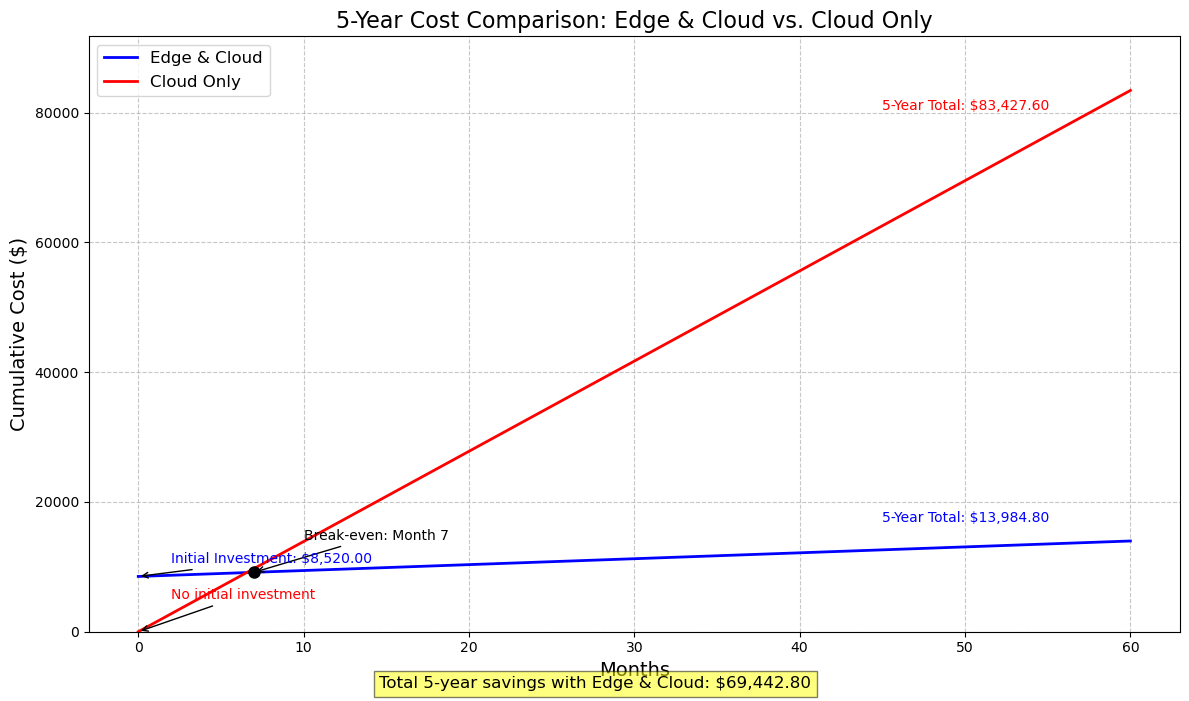

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initial costs and monthly costs
edge_cloud_initial = 3520 + 5000  # Edge devices + local server
edge_cloud_monthly = 91.08  # Monthly cloud cost

cloud_only_monthly = 1390.46  # Total monthly cost for cloud-only solution

# Calculate cumulative costs over 60 months (5 years)
months = np.arange(0, 61)
edge_cloud_costs = edge_cloud_initial + edge_cloud_monthly * months
cloud_only_costs = cloud_only_monthly * months

# Create the visualization
plt.figure(figsize=(12, 7))

# Plot cost curves
plt.plot(months, edge_cloud_costs, 'b-', linewidth=2, label='Edge & Cloud')
plt.plot(months, cloud_only_costs, 'r-', linewidth=2, label='Cloud Only')

# Find intersection point
intersection_month = None
for i in range(1, len(months)):
    if edge_cloud_costs[i-1] > cloud_only_costs[i-1] and edge_cloud_costs[i] <= cloud_only_costs[i]:
        intersection_month = i
    elif edge_cloud_costs[i-1] < cloud_only_costs[i-1] and edge_cloud_costs[i] >= cloud_only_costs[i]:
        intersection_month = i

if intersection_month:
    plt.plot(intersection_month, edge_cloud_costs[intersection_month], 'ko', markersize=8)
    plt.annotate(f'Break-even: Month {intersection_month}',
                xy=(intersection_month, edge_cloud_costs[intersection_month]),
                xytext=(intersection_month + 3, edge_cloud_costs[intersection_month] + 5000),
                arrowprops=dict(arrowstyle='->'))

# Add annotations for 5-year totals
plt.annotate(f'5-Year Total: ${edge_cloud_costs[-1]:,.2f}',
            xy=(60, edge_cloud_costs[-1]),
            xytext=(45, edge_cloud_costs[-1] + 3000),
            color='blue')

plt.annotate(f'5-Year Total: ${cloud_only_costs[-1]:,.2f}',
            xy=(60, cloud_only_costs[-1]),
            xytext=(45, cloud_only_costs[-1] - 3000),
            color='red')

# Add details
plt.title('5-Year Cost Comparison: Edge & Cloud vs. Cloud Only', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Cumulative Cost ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Add annotations for initial investments
plt.annotate(f'Initial Investment: ${edge_cloud_initial:,.2f}',
            xy=(0, edge_cloud_initial),
            xytext=(2, edge_cloud_initial + 2000),
            arrowprops=dict(arrowstyle='->'),
            color='blue')

plt.annotate('No initial investment',
            xy=(0, 0),
            xytext=(2, 5000),
            arrowprops=dict(arrowstyle='->'),
            color='red')

# Set y-axis limit to provide some padding at the top
max_cost = max(edge_cloud_costs[-1], cloud_only_costs[-1]) * 1.1
plt.ylim(0, max_cost)

# Calculate savings
if edge_cloud_costs[-1] < cloud_only_costs[-1]:
    savings = cloud_only_costs[-1] - edge_cloud_costs[-1]
    savings_text = f'Total 5-year savings with Edge & Cloud: ${savings:,.2f}'
else:
    savings = edge_cloud_costs[-1] - cloud_only_costs[-1]
    savings_text = f'Total 5-year savings with Cloud Only: ${savings:,.2f}'

plt.figtext(0.5, 0.01, savings_text, ha='center', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()